In [1]:
# from google.colab import drive
# drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.1


In [3]:
###    if the Version of tf is not 2.10.1 -----> Use this cell   ######
#!pip install tensorflow==2.10.1


In [8]:
########### Masssss Model Path#################
model_path = r'C:\Users\User\Desktop\Object Detection\h5 Files\My h5s\Mass_map_69.17.h5'


In [9]:
from tensorflow.keras.models import load_model
# Define the custom mean_iou metric
def mean_iou(y_true, y_pred):
    y_pred = tf.cast(y_pred > 0.5, tf.float32)  # Binarize predictions
    intersect = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32), axis=[1, 2, 3])
    union = tf.reduce_sum(tf.cast(y_true + y_pred, tf.float32), axis=[1, 2, 3]) - intersect
    iou = tf.where(union == 0, tf.ones_like(intersect), intersect / union)
    return tf.reduce_mean(iou)

# Load the model, passing the custom metric
model = load_model(model_path, custom_objects={'mean_iou': mean_iou})


1/1 [==============================] - 1s 1s/step


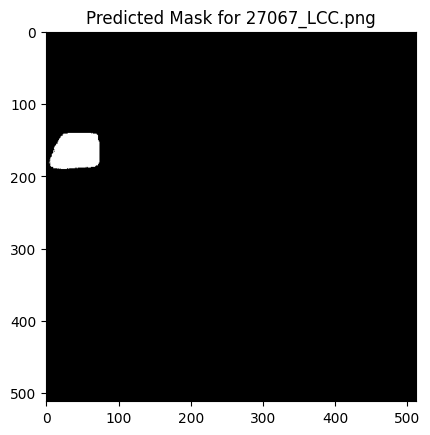

Filtered Bounding Boxes for 27067_LCC.png: [[141, 4, 191, 74]]
Filtered Confidence Scores for 27067_LCC.png: [0.91772044]
1/1 [==============================] - 1s 566ms/step


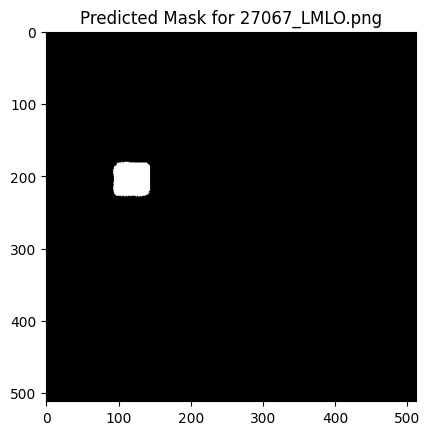

Filtered Bounding Boxes for 27067_LMLO.png: [[181, 93, 229, 144]]
Filtered Confidence Scores for 27067_LMLO.png: [0.9779204]
1/1 [==============================] - 1s 552ms/step


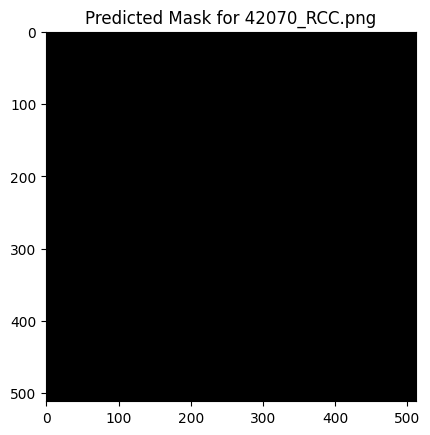

Filtered Bounding Boxes for 42070_RCC.png: []
Filtered Confidence Scores for 42070_RCC.png: []
1/1 [==============================] - 1s 535ms/step


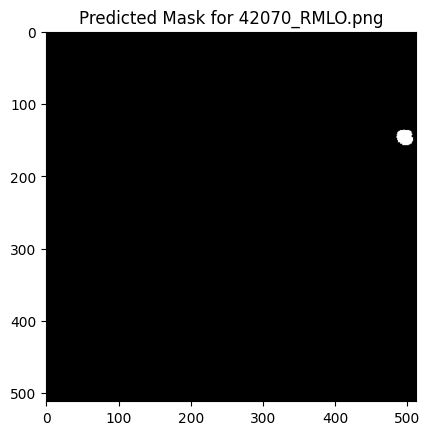

Filtered Bounding Boxes for 42070_RMLO.png: [[136, 485, 158, 508]]
Filtered Confidence Scores for 42070_RMLO.png: [0.6582545]
1/1 [==============================] - 1s 538ms/step


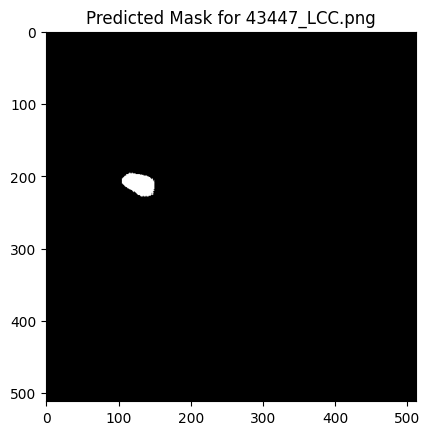

Filtered Bounding Boxes for 43447_LCC.png: [[196, 105, 229, 150]]
Filtered Confidence Scores for 43447_LCC.png: [0.6024484]
1/1 [==============================] - 1s 509ms/step


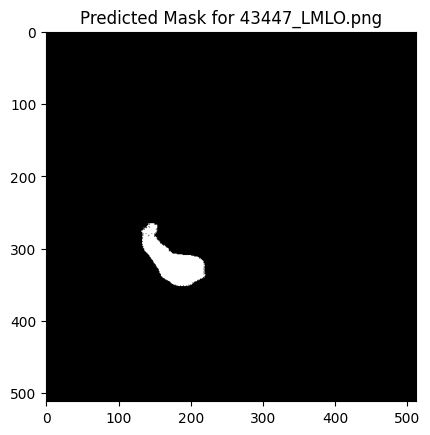

Filtered Bounding Boxes for 43447_LMLO.png: [[266, 132, 353, 221]]
Filtered Confidence Scores for 43447_LMLO.png: [0.6454341]
1/1 [==============================] - 1s 538ms/step


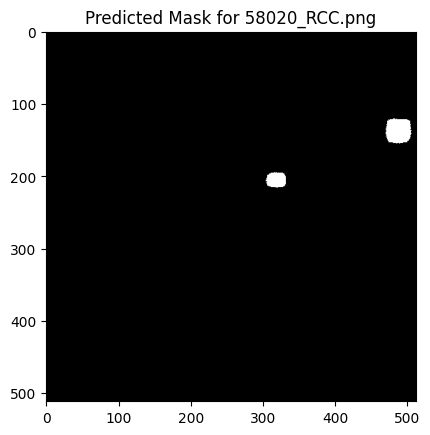

Filtered Bounding Boxes for 58020_RCC.png: [[121, 470, 156, 506], [195, 304, 217, 332]]
Filtered Confidence Scores for 58020_RCC.png: [0.90014887, 0.65530443]
1/1 [==============================] - 1s 576ms/step


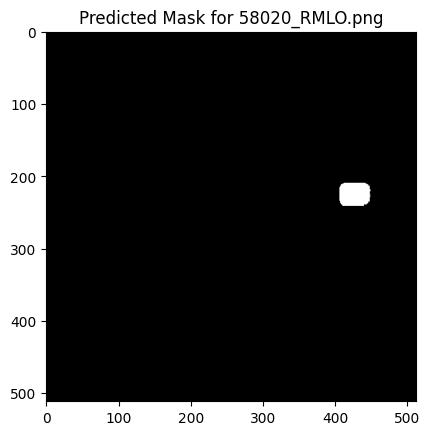

Filtered Bounding Boxes for 58020_RMLO.png: [[210, 406, 242, 449]]
Filtered Confidence Scores for 58020_RMLO.png: [0.94045556]
1/1 [==============================] - 0s 423ms/step


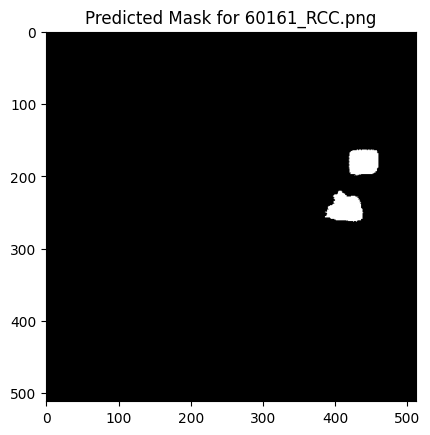

Filtered Bounding Boxes for 60161_RCC.png: [[164, 419, 200, 460], [221, 386, 264, 439]]
Filtered Confidence Scores for 60161_RCC.png: [0.96247673, 0.64141136]
1/1 [==============================] - 0s 433ms/step


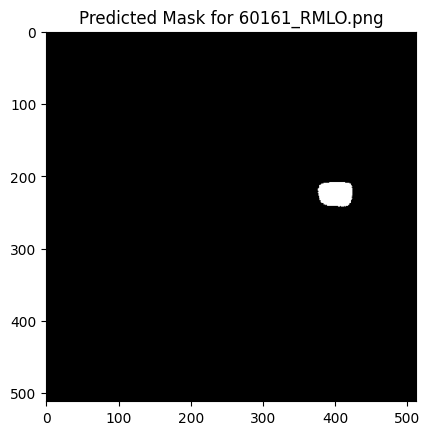

Filtered Bounding Boxes for 60161_RMLO.png: [[209, 376, 243, 424]]
Filtered Confidence Scores for 60161_RMLO.png: [0.8616917]
1/1 [==============================] - 0s 436ms/step


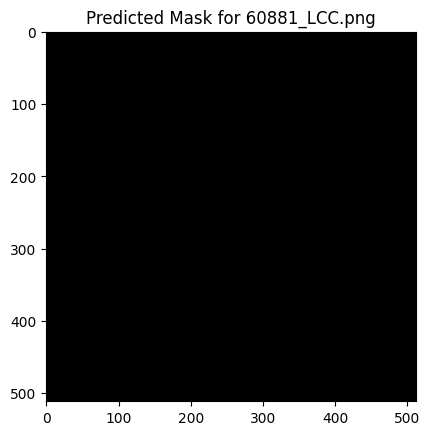

Filtered Bounding Boxes for 60881_LCC.png: []
Filtered Confidence Scores for 60881_LCC.png: []
1/1 [==============================] - 0s 421ms/step


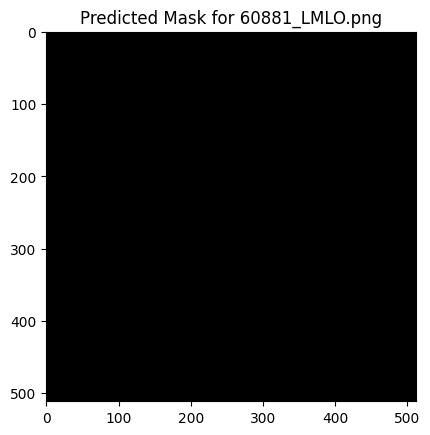

Filtered Bounding Boxes for 60881_LMLO.png: []
Filtered Confidence Scores for 60881_LMLO.png: []
1/1 [==============================] - 0s 437ms/step


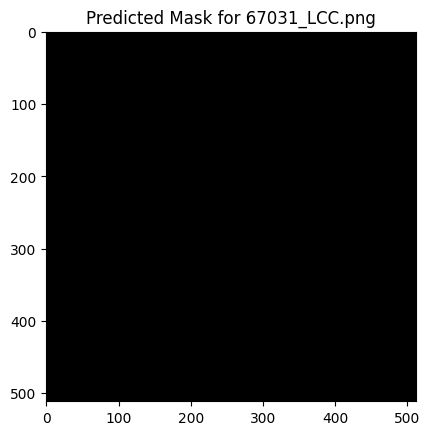

Filtered Bounding Boxes for 67031_LCC.png: []
Filtered Confidence Scores for 67031_LCC.png: []
1/1 [==============================] - 1s 591ms/step


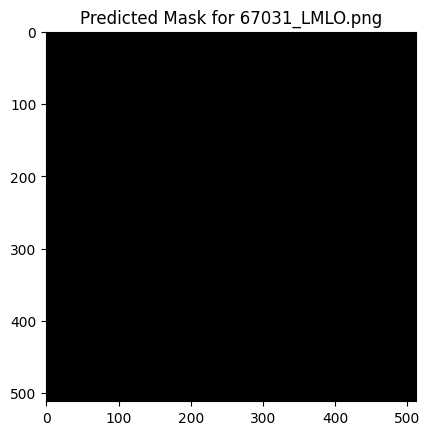

Filtered Bounding Boxes for 67031_LMLO.png: []
Filtered Confidence Scores for 67031_LMLO.png: []
1/1 [==============================] - 0s 470ms/step


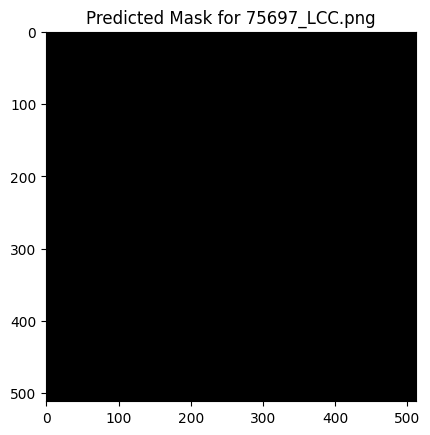

Filtered Bounding Boxes for 75697_LCC.png: []
Filtered Confidence Scores for 75697_LCC.png: []
1/1 [==============================] - 0s 437ms/step


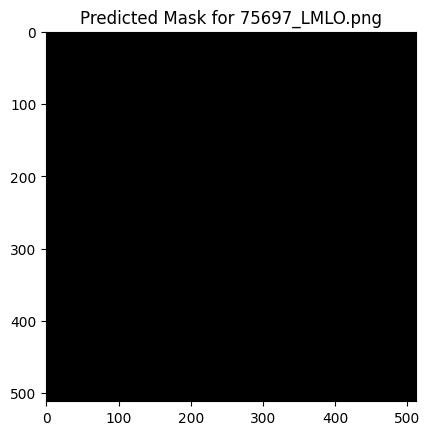

Filtered Bounding Boxes for 75697_LMLO.png: []
Filtered Confidence Scores for 75697_LMLO.png: []
1/1 [==============================] - 0s 457ms/step


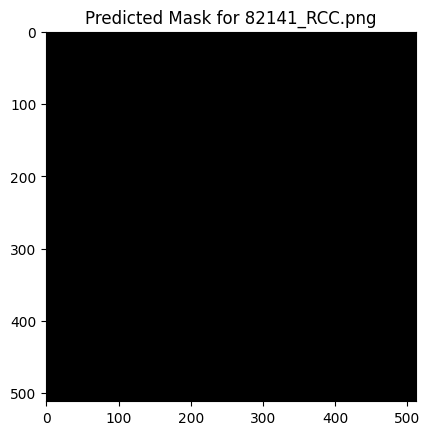

Filtered Bounding Boxes for 82141_RCC.png: []
Filtered Confidence Scores for 82141_RCC.png: []
1/1 [==============================] - 0s 441ms/step


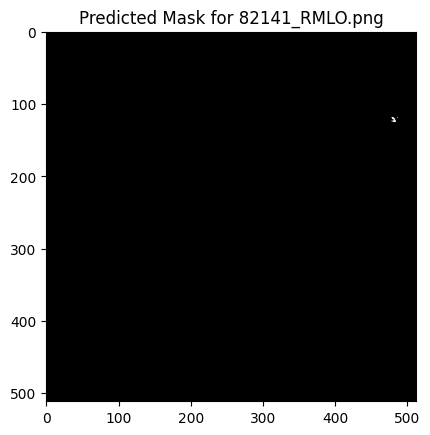

Filtered Bounding Boxes for 82141_RMLO.png: [[119, 478, 126, 487]]
Filtered Confidence Scores for 82141_RMLO.png: [0.51447064]
1/1 [==============================] - 1s 708ms/step


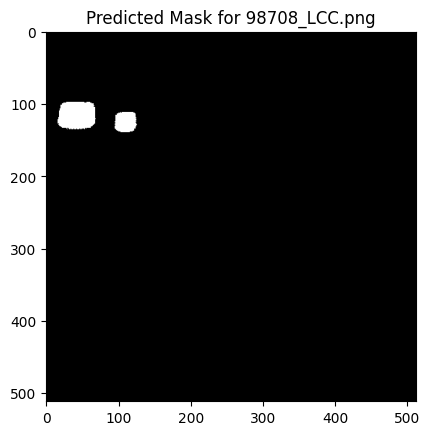

Filtered Bounding Boxes for 98708_LCC.png: [[98, 16, 136, 69], [112, 95, 140, 126]]
Filtered Confidence Scores for 98708_LCC.png: [0.98774946, 0.72925264]
1/1 [==============================] - 1s 642ms/step


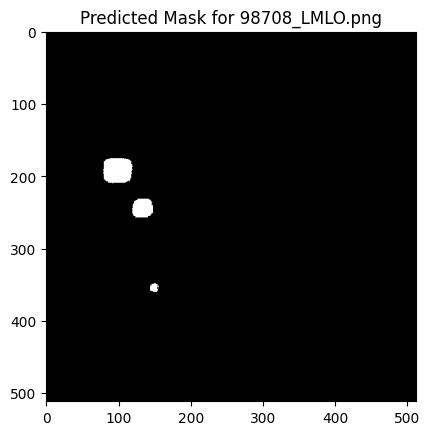

Filtered Bounding Boxes for 98708_LMLO.png: [[176, 79, 211, 120], [232, 119, 258, 148], [349, 144, 361, 156]]
Filtered Confidence Scores for 98708_LMLO.png: [0.90061915, 0.7294963, 0.5671023]


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from skimage.io import imread, imsave
from skimage.measure import label, regionprops
from scipy.spatial.distance import cdist

# Path to your test images (adjust the path accordingly)
TEST_PATH = r'C:\Users\User\Desktop\compitission\4'

# Load the trained model
#model_path = '/content/drive/MyDrive/Teknofest Dataset/Lesion Detection Team/h5 files/Mass_map_69.17.h5'
model = load_model(model_path, custom_objects={'mean_iou': mean_iou})  # Load with custom metric

# Get all test image file names
test_image_files = [f for f in os.listdir(TEST_PATH) if f.endswith('.png')]  # Adjust extension if needed

# Output directory to save predicted masks (if needed)
#########output_dir = '/content/drive/MyDrive/Teknofest Dataset/Lesion Detection Team/Predicted Masks'
#####os.makedirs(output_dir, exist_ok=True)

# Function to extract bounding boxes and confidence scores from predicted mask
def extract_bounding_boxes_and_confidence(pred_mask, raw_pred):
    labeled_mask = label(pred_mask)  # Label connected regions in the binary mask
    props = regionprops(labeled_mask)  # Get properties of each region (calcification)
    bboxes = []
    confidences = []

    # Loop over each detected region (calcification area)
    for region in props:
        # Get bounding box coordinates
        min_row, min_col, max_row, max_col = region.bbox
        bboxes.append([min_row, min_col, max_row, max_col])

        # Confidence score is the maximum raw probability value in this region
        region_mask = (labeled_mask == region.label)  # Mask for the specific region
        confidence = np.max(raw_pred[region_mask])  # Max confidence in the region
        confidences.append(confidence)

    return bboxes, confidences

# Proximity-based bounding box merging function
def merge_bounding_boxes_by_proximity(bboxes, confidences, distance_threshold=50):
    if len(bboxes) == 0:
        return [], []

    merged_bboxes = []
    merged_confidences = []
    used = set()

    # Convert bounding boxes to (x_center, y_center) for proximity calculation
    centers = np.array([[(b[1] + b[3]) / 2, (b[0] + b[2]) / 2] for b in bboxes])

    # Compute pairwise distances between bounding box centers
    distances = cdist(centers, centers)

    # Process each bounding box
    for i, bbox in enumerate(bboxes):
        if i in used:
            continue

        # Find all boxes close to the current one (within the distance threshold)
        close_boxes = np.where(distances[i] < distance_threshold)[0]

        # Combine the bounding boxes
        combined_min_row = min([bboxes[j][0] for j in close_boxes])
        combined_min_col = min([bboxes[j][1] for j in close_boxes])
        combined_max_row = max([bboxes[j][2] for j in close_boxes])
        combined_max_col = max([bboxes[j][3] for j in close_boxes])
        combined_confidence = max([confidences[j] for j in close_boxes])  # Take the highest confidence

        # Add the merged bounding box and confidence
        merged_bboxes.append([combined_min_row, combined_min_col, combined_max_row, combined_max_col])
        merged_confidences.append(combined_confidence)

        # Mark these boxes as used
        used.update(close_boxes)

    return merged_bboxes, merged_confidences

# Loop through all test images and predict masks
for image_file in test_image_files:
    # Construct the full path to the image
    image_path = os.path.join(TEST_PATH, image_file)

    # Load the image (512x512x1)
    test_image = imread(image_path)

    # Ensure the image has the correct shape (add channel dimension if grayscale)
    if test_image.ndim == 2:  # If the image is grayscale (512x512)
        test_image = np.expand_dims(test_image, axis=-1)

    # Add batch dimension (1, 512, 512, 1) for model prediction
    test_image = np.expand_dims(test_image, axis=0)

    # Predict the mask using the loaded model (get raw predictions)
    pred_mask = model.predict(test_image)

    # Threshold the predicted mask (optional, for binary classification)
    pred_mask_binary = (pred_mask > 0.5).astype(np.uint8)

    # Remove batch dimension for further processing
    pred_mask_binary = pred_mask_binary[0, :, :, 0]
    raw_pred = pred_mask[0, :, :, 0]  # Get the raw prediction values (without thresholding)

    # Extract bounding boxes and confidence scores
    bboxes, confidences = extract_bounding_boxes_and_confidence(pred_mask_binary, raw_pred)

    # Merge bounding boxes based on proximity
    filtered_bboxes, filtered_confidences = merge_bounding_boxes_by_proximity(bboxes, confidences)

    # Visualize the predicted mask (optional)
    plt.imshow(pred_mask_binary, cmap='gray')
    plt.title(f'Predicted Mask for {image_file}')
    plt.show()

    # Print merged bounding boxes and confidence scores
    print(f"Filtered Bounding Boxes for {image_file}: {filtered_bboxes}")
    print(f"Filtered Confidence Scores for {image_file}: {filtered_confidences}")

    # You can save the filtered bounding boxes and confidences as needed


In [8]:
print(test_image.shape)

(1, 512, 512, 1)


# **Get the original sizes of the images:**

In [11]:
import pandas as pd

# Load the CSV file #### The file that contain the SIZE COLUMN
csv_file = r'C:\Users\User\Desktop\compitission\CSV_mammogram_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Create the original_sizes dictionary
original_sizes = {}

# Iterate through the DataFrame and construct the dictionary
for index, row in df.iterrows():
    # Construct the image name by combining PatientID and Mammogram Type
    image_name = f"{row['PatientID']}_{row['Mammogram Type']}.png"

    # Parse the size from the string and convert it into a tuple
    size = tuple(map(int, row['The size of the image'].strip("()").split(',')))

    # Add to the dictionary
    original_sizes[image_name] = size

# Print the result
print(original_sizes)


{'27067_LCC.png': (2364, 2964), '27067_LMLO.png': (2364, 2964), '42070_RCC.png': (2816, 3584), '42070_RMLO.png': (2816, 3584), '43447_LCC.png': (2800, 3518), '43447_LMLO.png': (2800, 3518), '58020_RCC.png': (2364, 2964), '58020_RMLO.png': (2364, 2964), '60161_RCC.png': (2364, 2964), '60161_RMLO.png': (2364, 2964), '60881_LCC.png': (2364, 2964), '60881_LMLO.png': (2364, 2964), '67031_LCC.png': (2364, 2964), '67031_LMLO.png': (2364, 2964), '75697_LCC.png': (2782, 3580), '75697_LMLO.png': (2812, 3580), '82141_RCC.png': (2816, 3584), '82141_RMLO.png': (2816, 3584), '98708_LCC.png': (2394, 2850), '98708_LMLO.png': (2394, 2850)}


In [12]:
import csv

# Output CSV file path MASSSSSSS
csv_file = r'C:\Users\User\Desktop\compitission\kitle_Predictions.csv'

# Original dimensions of each image (you should know the original sizes from the dataset)
original_sizes = original_sizes


# Open the CSV file for writing
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row with the new 'category' column
    writer.writerow(['Image Name', 'Bounding Box (x1,y1;x2,y2;x3,y3;x4,y4)', 'Confidence Score', 'Category'])

    # Loop through all test images and save predictions
    for image_file in test_image_files:
        # Get the original size for the image
        original_height, original_width = original_sizes.get(image_file, (512, 512))  # Default is 512x512 if not found

        # Scaling factors to convert from 512x512 back to original size
        scale_x = original_width / 512
        scale_y = original_height / 512

        # Construct the full path to the image
        image_path = os.path.join(TEST_PATH, image_file)

        # Load the image (512x512x1)
        test_image = imread(image_path)

        # Ensure the image has the correct shape (add channel dimension if grayscale)
        if test_image.ndim == 2:  # If the image is grayscale (512x512)
            test_image = np.expand_dims(test_image, axis=-1)

        # Add batch dimension (1, 512, 512, 1) for model prediction
        test_image = np.expand_dims(test_image, axis=0)

        # Predict the mask using the loaded model (get raw predictions)
        pred_mask = model.predict(test_image)

        # Threshold the predicted mask (optional, for binary classification)
        pred_mask_binary = (pred_mask > 0.5).astype(np.uint8)

        # Remove batch dimension for further processing
        pred_mask_binary = pred_mask_binary[0, :, :, 0]
        raw_pred = pred_mask[0, :, :, 0]  # Get the raw prediction values (without thresholding)

        # Extract bounding boxes and confidence scores
        bboxes, confidences = extract_bounding_boxes_and_confidence(pred_mask_binary, raw_pred)

        # Check if any calcification is detected (i.e., if there are bounding boxes)
        if len(bboxes) > 0:
            # Merge bounding boxes based on proximity
            filtered_bboxes, filtered_confidences = merge_bounding_boxes_by_proximity(bboxes, confidences)

            # Convert the bounding boxes to the committee format and write them to CSV
            for bbox, confidence in zip(filtered_bboxes, filtered_confidences):
                min_row, min_col, max_row, max_col = bbox

                # Rescale the bounding box coordinates back to the original size
                min_row_original = min_row * scale_y
                min_col_original = min_col * scale_x
                max_row_original = max_row * scale_y
                max_col_original = max_col * scale_x

                # Create the committee's bounding box format (x1,y1;x2,y2;x3,y3;x4,y4)
                x1, y1 = min_col_original, min_row_original  # Top-left
                x2, y2 = min_col_original, max_row_original  # Bottom-left
                x3, y3 = max_col_original, max_row_original  # Bottom-right
                x4, y4 = max_col_original, min_row_original  # Top-right

                bounding_box_format = f"{x1},{y1};{x2},{y2};{x3},{y3};{x4},{y4}"

                # Write the prediction to the CSV file, with 'kalsifikasyon' as the category
                writer.writerow([image_file, bounding_box_format, confidence, 'kitle'])
        else:
            # If no calcification detected (normal image), write with empty bounding box and confidence
            writer.writerow([image_file, '', '', 'normal'])

print(f"Predictions saved to {csv_file}")


1/1 [==============================] - 1s 732ms/step
Predictions saved to C:\Users\User\Desktop\Test10\kitle_Predictions.csv
